### GE461 Project 3

In [176]:
import numpy as np
import matplotlib.pyplot as plt

In [177]:
# Loading the data set 
train = np.loadtxt('/Users/mustafacankanbalci/Desktop/EE YEAR 4 2/GE461/Project 3/data_supervised_learning_project/train1.txt')
test = np.loadtxt('/Users/mustafacankanbalci/Desktop/EE YEAR 4 2/GE461/Project 3/data_supervised_learning_project/test1.txt')


In [178]:
train_x = np.array(train[:,0])
train_y = np.array(train[:,1])

In [179]:
print(train_x.shape)

(60,)


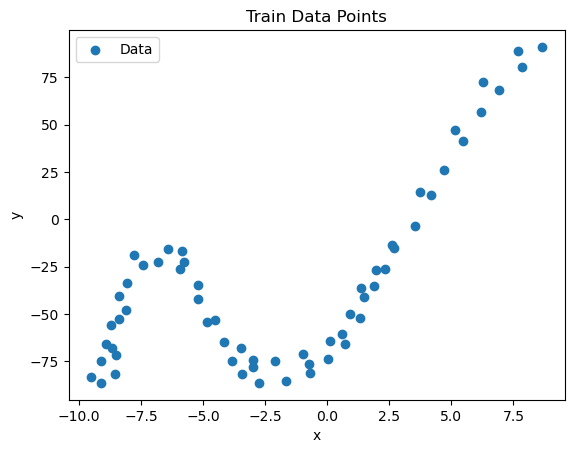

In [180]:
plt.figure()
plt.scatter(train_x, train_y, label='Data')
plt.xlabel('x')
plt.ylabel('y')
plt.title("Train Data Points")
plt.legend()

In [181]:
test_x = test[:,0]
test_y = test[:,1]

In [182]:
mean_test_x = np.mean(test_x)
mean_test_y = np.mean(test_y)

std_test_x = np.std(test_x)
std_test_y = np.std(test_y)

test_x_normalized  =(test_x - mean_test_x) / std_test_x

test_y_normalized = (test_y - mean_test_y) / std_test_y


In [183]:
print(test_x.shape)

(41,)


In [194]:
def sigmoid(X):
    return 1/(1+np.exp(-X))

## Part A

In [195]:
def init_weights(input_size, hidden_size, output_size):

    if hidden_size != 0:
        W_xh = np.random.randn(input_size,hidden_size)*0.1
        b_h = np.zeros((1,hidden_size))
        W_hy = np.random.randn(hidden_size,output_size)*0.1
        b_y = np.zeros((1,output_size))

        documents = {"W_xh": W_xh,"b_h": b_h,"W_hy": W_hy,"b_y": b_y, "hidden_layer": True}
    else:
        W = np.random.randn(1,1)*0.01
        b = np.zeros((1,1))

        documents = {"W": W,"b": b, "hidden_layer": False}

    return documents
     

In [196]:
def forward_pass(documents,x):

    hidden_layer = documents["hidden_layer"]

    if hidden_layer == False:
        W = documents['W']
        b = documents['b']

        z = W*x + b
        return z,0
    
    else:
        W_xh = documents['W_xh']
        b_h = documents['b_h']
        W_hy = documents['W_hy']
        b_y = documents['b_y']

        temp = np.dot(x,W_xh) + b_h
        z_hidden = sigmoid(temp)
        output = np.dot(z_hidden,W_hy) + b_y
        
        return output, z_hidden
        

In [197]:
def loss(predicted_y, train_y):
    return np.mean((predicted_y-train_y)**2)

In [198]:
def backpropagation(documents,train_x,predicted_y, train_y,z_hidden):

    hidden_layer = documents["hidden_layer"]

    if hidden_layer  == False:
        
        d_output = 2*(predicted_y-train_y) 
        dW = np.mean(d_output * train_x)
        db = np.mean(d_output)

        return {"dW":dW,"db": db}
    else:
        
        W_hy = documents['W_hy']  
      
        n = 1              
                  
        d_output = (2.0 / n) * (predicted_y - train_y)                  

        dW_hy = z_hidden.T @ d_output      
        db_y  = np.sum(d_output, 0, keepdims=True)

        dz    = d_output @ W_hy.T     
        da    = dz * z_hidden * (1 - z_hidden)      

        dW_xh = train_x * da            
        db_h  = np.sum(da, 0, keepdims=True)

        return {
            "dW_hy": dW_hy,
            "db_y":  db_y,
            "dW_xh": dW_xh,
            "db_h":  db_h
        }

In [488]:
def update_parameters(documents,grads,lr):

    hidden_layer = documents["hidden_layer"] 

    if hidden_layer  == False:
        documents["W"] -= lr*grads["dW"]
        documents["b"] -= lr*grads["db"]  
        return documents
    else:
        documents['W_xh'] -= lr*grads["dW_xh"]
        documents['b_h'] -= lr*grads["db_h"]
        documents['W_hy'] -= lr*grads["dW_hy"]
        documents['b_y'] -= lr*grads["db_y"]
       
        return documents

In [489]:
mean_x = np.mean(train_x)
mean_y = np.mean(train_y)

std_x = np.std(train_x)
std_y = np.std(train_y)

train_x_normalized  =(train_x - mean_x) / std_x

train_y_normalized = (train_y - mean_y) / std_y


In [514]:
epochs = 2000
lr = 0.075
patience = 100

np.random.seed(42)

# init weights 
documents = init_weights(1,8,1)



In [515]:
temp = 0
patience_temp = 0

train_cost_list  = []
for epoch in range(epochs):
    
    # Shuffle the dataset
    indices = np.arange(train_x.shape[0])
    np.random.shuffle(indices)
    train_shuffle_y = train_y_normalized[indices]
    train_shuffle_x = train_x_normalized[indices]
    train_cost = 0
    n = train_shuffle_x.shape[0]

    for i in range(len(train_shuffle_x)):

        # Forward pass 
        output_temp,z_hidden = forward_pass(documents,train_shuffle_x[i])

        
        # Cost of Function 
        train_cost += loss(output_temp,train_shuffle_y[i])

      

        # Backpropagation 
        grads = backpropagation(documents,train_shuffle_x[i],output_temp,train_shuffle_y[i],z_hidden)

        # Update Parameters
        documents = update_parameters(documents,grads,lr)

    train_cost /= n
    if epoch == 0:
        temp = train_cost

    if train_cost >= temp:
        patience_temp += 1
    else:
        patience_temp = 0
        temp = train_cost

    train_cost_list.append(train_cost)

    print(f'Epoch {epoch +1 }: Train Cost: {train_cost} patience: {patience_temp} ')

    if patience_temp >= patience:
        print("Early stopping triggered.")
        break

    

Epoch 1: Train Cost: 1.2339802797284383 patience: 1 
Epoch 2: Train Cost: 1.080562131841747 patience: 0 
Epoch 3: Train Cost: 0.7990841860010178 patience: 0 
Epoch 4: Train Cost: 0.5809194279095666 patience: 0 
Epoch 5: Train Cost: 0.6460092637948858 patience: 1 
Epoch 6: Train Cost: 0.5094758919514356 patience: 0 
Epoch 7: Train Cost: 0.5663608358215265 patience: 1 
Epoch 8: Train Cost: 0.47125951418301154 patience: 0 
Epoch 9: Train Cost: 0.4810256293087033 patience: 1 
Epoch 10: Train Cost: 0.4140313807829613 patience: 0 
Epoch 11: Train Cost: 0.35787248462640625 patience: 0 
Epoch 12: Train Cost: 0.32779688316577116 patience: 0 
Epoch 13: Train Cost: 0.31048781135190545 patience: 0 
Epoch 14: Train Cost: 0.2746237876658469 patience: 0 
Epoch 15: Train Cost: 0.2663383444065644 patience: 0 
Epoch 16: Train Cost: 0.24602115802285104 patience: 0 
Epoch 17: Train Cost: 0.23702938954193087 patience: 0 
Epoch 18: Train Cost: 0.23254874922384566 patience: 0 
Epoch 19: Train Cost: 0.2336759

In [516]:
n = train_shuffle_x.shape[0]

a  = train_x_normalized.reshape(n,1)
b = train_y_normalized.reshape(n,1)
max_a = np.max(a)
min_a = np.min(a)
s = np.linspace(min_a,max_a,60).reshape(60,1)

In [517]:
output_temp,z_hidden = forward_pass(documents,s)


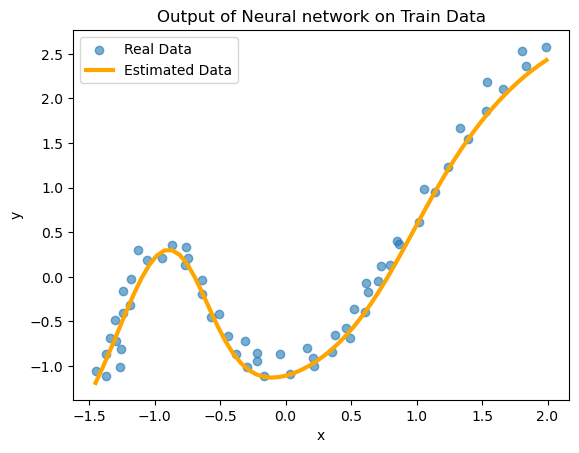

In [518]:
plt.figure()
plt.scatter(a, b, label='Real Data', alpha=0.6)
plt.plot(s,output_temp,label='Estimated Data',color='orange',linewidth=3)
plt.xlabel('x')
plt.ylabel('y')
plt.title("Output of Neural network on Train Data")
plt.legend()

In [519]:
test_a  =test_x_normalized.reshape(41,1)
test_b = test_y_normalized.reshape(41,1)


max_a = np.max(test_a)
min_a = np.min(test_a)

m =  test_a.shape[0]

s = np.linspace(min_a,max_a,m).reshape(m,1)


output_temp_test, _  = forward_pass(documents,s)


In [520]:
output_temp_train ,z_hidden = forward_pass(documents,a)
train_loss = (output_temp_train-b)**2

output_temp_test2 ,z_hidden = forward_pass(documents,test_a)
test_loss = (output_temp_test2-test_b)**2

print(f' Train loss Mean: {np.mean(train_loss):.3f}, Train loss std: {np.std(train_loss):.3f},Test loss Mean: {np.mean(test_loss):.3f}, Test loss std: {np.std(test_loss):.3f} ')

 Train loss Mean: 0.032, Train loss std: 0.042,Test loss Mean: 0.050, Test loss std: 0.082 


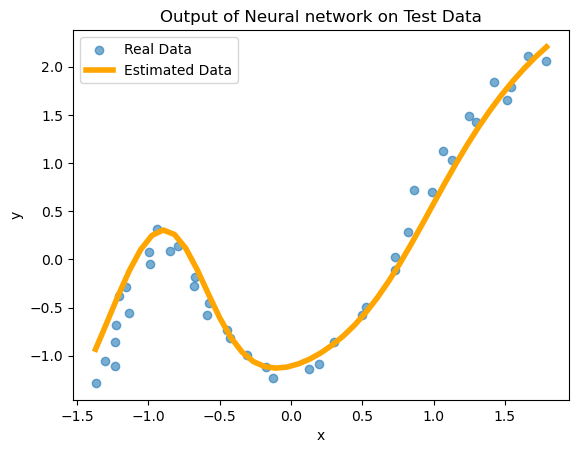

In [507]:
plt.figure()
plt.scatter(test_a, test_b, label='Real Data', alpha=0.6)
plt.plot(s,output_temp_test,label='Estimated Data',color='orange',linewidth=4)
plt.xlabel('x')
plt.ylabel('y')
plt.title("Output of Neural network on Test Data")
plt.legend()

In [508]:
# Ploting the Linear Regresion  

epochs = 100
lr = 0.01
patience = 100

np.random.seed(42)

# init weights 
documents = init_weights(1,0,1)

temp = 0
patience_temp = 0

train_cost_list  = []
for epoch in range(epochs):
    
    # Shuffle the dataset
    indices = np.arange(train_x.shape[0])
    np.random.shuffle(indices)
    train_shuffle_y = train_y_normalized[indices]
    train_shuffle_x = train_x_normalized[indices]
    train_cost = 0
    n = train_shuffle_x.shape[0]

    for i in range(len(train_shuffle_x)):

        # Forward pass 
        output_temp,z_hidden = forward_pass(documents,train_shuffle_x[i])

        
        # Cost of Function 
        train_cost += loss(output_temp,train_shuffle_y[i])

      

        # Backpropagation 
        grads = backpropagation(documents,train_shuffle_x[i],output_temp,train_shuffle_y[i],z_hidden)

        # Update Parameters
        documents = update_parameters(documents,grads,lr)

    train_cost /= n
    if epoch == 0:
        temp = train_cost

    if train_cost >= temp:
        patience_temp += 1
    else:
        patience_temp = 0
        temp = train_cost

    train_cost_list.append(train_cost)

    print(f'Epoch {epoch +1 }: Train Cost: {train_cost} patience: {patience_temp} ')

    if patience_temp >= patience:
        print("Early stopping triggered.")
        break

Epoch 1: Train Cost: 0.7400171385865322 patience: 1 
Epoch 2: Train Cost: 0.5509908568537268 patience: 0 
Epoch 3: Train Cost: 0.5345191494742974 patience: 0 
Epoch 4: Train Cost: 0.5353922768048288 patience: 1 
Epoch 5: Train Cost: 0.5311559581687315 patience: 0 
Epoch 6: Train Cost: 0.5334455078938551 patience: 1 
Epoch 7: Train Cost: 0.5297926102245176 patience: 0 
Epoch 8: Train Cost: 0.534597303787146 patience: 1 
Epoch 9: Train Cost: 0.5329975020760533 patience: 2 
Epoch 10: Train Cost: 0.5314653308797916 patience: 3 
Epoch 11: Train Cost: 0.5327041355710519 patience: 4 
Epoch 12: Train Cost: 0.5302714891658566 patience: 5 
Epoch 13: Train Cost: 0.5337188624377686 patience: 6 
Epoch 14: Train Cost: 0.5348864259064641 patience: 7 
Epoch 15: Train Cost: 0.5326711147160424 patience: 8 
Epoch 16: Train Cost: 0.5346933624949288 patience: 9 
Epoch 17: Train Cost: 0.5254811232133721 patience: 0 
Epoch 18: Train Cost: 0.5325348423586348 patience: 1 
Epoch 19: Train Cost: 0.53366219994073

In [509]:
n = train_shuffle_x.shape[0]

a  = train_x_normalized.reshape(n,1)
b = train_y_normalized.reshape(n,1)
max_a = np.max(a)
min_a = np.min(a)

s = np.linspace(min_a,max_a,n).reshape(n,1)

In [ ]:
output_temp,z_hidden = forward_pass(documents,s)

In [ ]:
output_temp_train ,z_hidden = forward_pass(documents,a)
train_loss = (output_temp_train-b)**2

output_temp_test ,z_hidden = forward_pass(documents,test_a)
test_loss = (output_temp_test-test_b)**2

print(f' Train loss Mean: {np.mean(train_loss):.3f}, Train loss std: {np.std(train_loss):.3f},Test loss Mean: {np.mean(test_loss):.3f}, Test loss std: {np.std(test_loss):.3f} ')

 Train loss Mean: 0.515, Train loss std: 0.439,Test loss Mean: 0.431, Test loss std: 0.442 


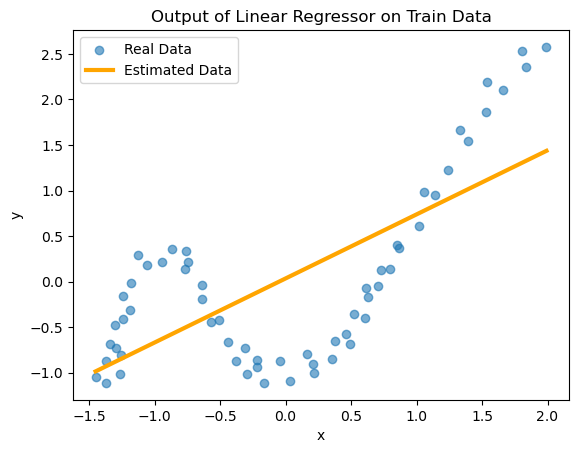

In [487]:
plt.figure()
plt.scatter(a, b, label='Real Data', alpha=0.6)
plt.plot(s,output_temp,label='Estimated Data',color='orange',linewidth=3)
plt.xlabel('x')
plt.ylabel('y')
plt.title("Output of Linear Regressor on Train Data")
plt.legend()

In [478]:
hidden_list  = [2,4,8,16,32]

documents_list  = []
train_cost_list_2 = []

In [479]:
for hidden_number in hidden_list:
    epochs = 2000
    lr = 0.01
    patience = 100

    np.random.seed(42)

    # init weights 
    documents = init_weights(1,hidden_number,1)

    temp = 0
    patience_temp = 0

    train_cost_list  = []
    for epoch in range(epochs):
        
        # Shuffle the dataset
        indices = np.arange(train_x.shape[0])
        np.random.shuffle(indices)
        train_shuffle_y = train_y_normalized[indices]
        train_shuffle_x = train_x_normalized[indices]
        train_cost = 0
        n = train_shuffle_x.shape[0]

        for i in range(len(train_shuffle_x)):

            # Forward pass 
            output_temp,z_hidden = forward_pass(documents,train_shuffle_x[i])

            
            # Cost of Function 
            train_cost += loss(output_temp,train_shuffle_y[i])

        

            # Backpropagation 
            grads = backpropagation(documents,train_shuffle_x[i],output_temp,train_shuffle_y[i],z_hidden)

            # Update Parameters
            documents = update_parameters(documents,grads,lr)

        train_cost /= n
        if epoch == 0:
            temp = train_cost

        if train_cost >= temp:
            patience_temp += 1
        else:
            patience_temp = 0
            temp = train_cost

        train_cost_list.append(train_cost)

        print(f'Epoch {epoch +1 }: Train Cost: {train_cost} patience: {patience_temp} ')

        if patience_temp >= patience:
            print("Early stopping triggered.")
            break
    documents_list.append(documents)
    train_cost_list_2.append(train_cost_list)
    

Epoch 1: Train Cost: 1.0291651659793777 patience: 1 
Epoch 2: Train Cost: 1.0262381102018854 patience: 0 
Epoch 3: Train Cost: 1.0223075081612094 patience: 0 
Epoch 4: Train Cost: 1.024745502743993 patience: 1 
Epoch 5: Train Cost: 1.0179192381014266 patience: 0 
Epoch 6: Train Cost: 1.0144811483187606 patience: 0 
Epoch 7: Train Cost: 1.0069783814576085 patience: 0 
Epoch 8: Train Cost: 1.0062222078559782 patience: 0 
Epoch 9: Train Cost: 0.9973084598920228 patience: 0 
Epoch 10: Train Cost: 0.9779566110838361 patience: 0 
Epoch 11: Train Cost: 0.9586616467217898 patience: 0 
Epoch 12: Train Cost: 0.950810538413566 patience: 0 
Epoch 13: Train Cost: 0.9280735562939769 patience: 0 
Epoch 14: Train Cost: 0.8965770531588483 patience: 0 
Epoch 15: Train Cost: 0.8650209217730244 patience: 0 
Epoch 16: Train Cost: 0.8270508861732997 patience: 0 
Epoch 17: Train Cost: 0.7787995475838643 patience: 0 
Epoch 18: Train Cost: 0.7512809141617284 patience: 0 
Epoch 19: Train Cost: 0.710118436686753

In [480]:
n = train_shuffle_x.shape[0]

a  = train_x_normalized.reshape(n,1)
b = train_y_normalized.reshape(n,1)
max_a = np.max(a)
min_a = np.min(a)

s = np.linspace(min_a,max_a,n).reshape(n,1)

In [481]:
outputs = []
for i in documents_list:
    output_temp,z_hidden = forward_pass(i,s)
    outputs.append(output_temp)

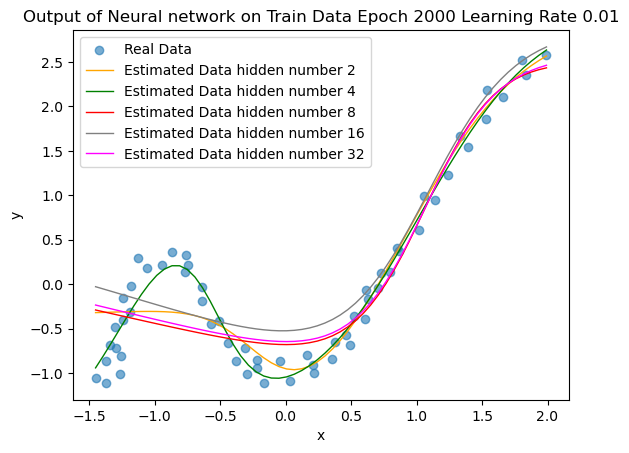

In [482]:
colors = ["orange","green","red","grey","magenta"]


plt.figure()
plt.scatter(a, b, label='Real Data', alpha=0.6)

for i in range(len(colors)):
    plt.plot(s,outputs[i],label=f'Estimated Data hidden number {hidden_list[i]}',color=colors[i],linewidth=1)
    
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'Output of Neural network on Train Data Epoch {epochs} Learning Rate {lr}')
plt.legend()

In [483]:
# All loss for hidden layers 

for i in range(len(hidden_list)):

    output_temp_train ,z_hidden = forward_pass(documents_list[i],a)
    train_loss = (output_temp_train-b)**2

    output_temp_test ,z_hidden = forward_pass(documents_list[i],test_a)
    test_loss = (output_temp_test-test_b)**2
    
    print(f'Hidden Number: {hidden_list[i]}, Train loss Mean: {np.mean(train_loss):.3f}, Train loss std: {np.std(train_loss):.3f},Test loss Mean: {np.mean(test_loss):.3f}, Test loss std: {np.std(test_loss):.3f} ')




Hidden Number: 2, Train loss Mean: 0.098, Train loss std: 0.154,Test loss Mean: 0.113, Test loss std: 0.191 
Hidden Number: 4, Train loss Mean: 0.027, Train loss std: 0.047,Test loss Mean: 0.061, Test loss std: 0.089 
Hidden Number: 8, Train loss Mean: 0.138, Train loss std: 0.195,Test loss Mean: 0.152, Test loss std: 0.202 
Hidden Number: 16, Train loss Mean: 0.175, Train loss std: 0.237,Test loss Mean: 0.209, Test loss std: 0.302 
Hidden Number: 32, Train loss Mean: 0.140, Train loss std: 0.192,Test loss Mean: 0.158, Test loss std: 0.215 
